# Numpy实现浅层神经网络


实践部分将搭建神经网络，包含一个隐藏层，实验将会展现出与Logistic回归的不同之处。

实验将使用两层神经网络实现对“花”型图案的分类，如图所示，图中的点包含红点（y=0）和蓝点（y=1）还有点的坐标信息，实验将通过以下步骤完成对两种点的分类，使用Numpy实现。

- 输入样本；

- 搭建神经网络；

- 初始化参数；

- 训练，包括前向传播与后向传播（即BP算法）；

- 得出训练后的参数；

- 根据训练所得参数，绘制两类点边界曲线。

<img src="../image/data.png" style="width:400px;height:300px;">

该实验将使用Python原生库实现两层神经网络的搭建，完成分类。


## 1 - 引用库

首先，载入几个需要用到的库，它们分别是：
- numpy：一个python的基本库，用于科学计算
- planar_utils：定义了一些工具函数
- matplotlib：用于生成图，在验证模型准确率和展示成本变化趋势时会使用到
- testCases：提供测试用例来验证模型准确率
- sklearn：提供有效的工具用于数据挖掘和数据分析

In [6]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - 载入数据并观察纬度

载入数据后，输出维度

ValueError: c of shape (1, 400) not acceptable as a color sequence for x with size 400, y with size 400

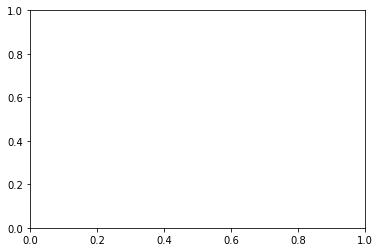

In [5]:
X, Y = load_planar_dataset()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

由输出可知每组输入坐标包含两个值，包含一个值，共320组数据（测试集在训练集基础上增加80组数据，共400组）。

## 3 - 简单逻辑回归实验

使用逻辑回归处理该数据，观察分类结果

In [6]:
#训练逻辑回归分类器
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);
#绘制逻辑回归分类边界
plot_decision_boundary(lambda x: clf.predict(x), train_x, train_y)
plt.title("Logistic Regression")

#输出准确率
LR_predictions = clf.predict(train_x.T)
print ('Accuracy of logistic regression:%d ' % float((np.dot(train_y,LR_predictions) + np.dot(1-train_y,1-LR_predictions))/float(train_y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")


NameError: name 'X' is not defined

可以看出逻辑回归效果并不好，这是因为逻辑回归网络结构只包含输入层和输出层，无法拟合更为复杂的模型，下面尝试神经网络模型。